## Iris Dataset

### 1. Schritt: Laden des Datensatzes in einen Dataframe

In [95]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

data = pd.read_csv("./datasets/iris/data.all", sep=' ', header = None, names=["sl","sw","pl","pw","class"]) 
data

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Grundlegende Statistiken des Datensatzes:

In [75]:
data.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [91]:
data.dtypes

sl       float64
sw       float64
pl       float64
pw       float64
class     object
dtype: object

In [77]:
# Seperate Classes from Dataframe
iris_class = []
for i in sorted(set(data['class'])):
    df = data.where(data['class'] == i)
    df = df.dropna()
    iris_class.append(df)
    

   
iris_setosa = data.where(data['class'] == "Iris-setosa")
iris_versicolor = data.where(data['class'] == "Iris-versicolor")
iris_virginica = data.where(data['class'] == "Iris-virginica")

#### Klassenbezogene Statistiken

In [83]:
iris_setosa.describe()

,sl,sw,pl,pw
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [84]:
iris_versicolor.describe()

,sl,sw,pl,pw
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [85]:
iris_virginica.describe()

,sl,sw,pl,pw
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### 2. Schritt: Dartsellung der Daten in Scattermatrix

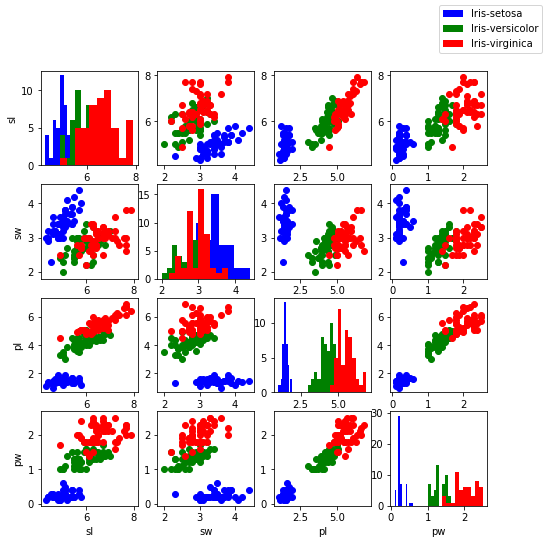

In [80]:
fig, axes = plt.subplots(nrows=len(data.keys())-1, ncols=len(data.keys())-1, figsize=(8,8))

index_i = 0
for i in data.keys()[:len(data.keys())-1]:
    index_j = 0
    for j in data.keys()[:len(data.keys())-1]:
        if index_j == 0: 
            axes[index_i][index_j].set_ylabel(i)
        if index_i == len(data.keys())-2:
            axes[index_i][index_j].set_xlabel(j)
            
        if j != i:
            axes[index_i][index_j].scatter(iris_setosa[j],iris_setosa[i], color='b')
            axes[index_i][index_j].scatter(iris_versicolor[j],iris_versicolor[i], color='g')
            axes[index_i][index_j].scatter(iris_virginica[j],iris_virginica[i], color='r')
        elif i == j:
            axes[index_i][index_j].hist(iris_setosa[i], color='b', histtype='barstacked', stacked=True)
            axes[index_i][index_j].hist(iris_versicolor[i], color='g', histtype='barstacked', stacked=True)
            axes[index_i][index_j].hist(iris_virginica[i], color='r', histtype='barstacked', stacked=True)
            
            
        index_j = index_j+1
    index_i = index_i+1

fig.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()



### Dartsellung der Daten in Boxplots

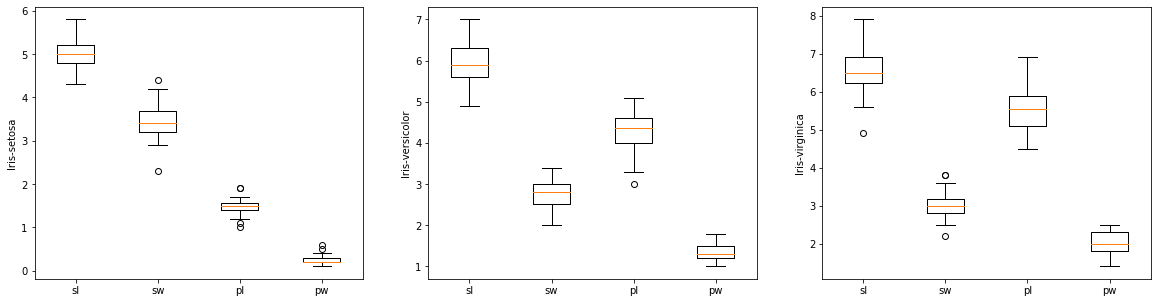

In [73]:
fig, axes = plt.subplots(ncols=(len(set(data['class']))), figsize=(20,5))
index = 0
for i in iris_class:
    data_iris = []
    for j in data.keys()[:len(data.keys())-1]:
        data_iris.append(i[j])
        
    axes[index].set_ylabel(set(i['class']).pop())
    axes[index].boxplot(data_iris)
    axes[index].set_xticklabels(data.keys()[:len(data.keys())-1])
    index = index+1

plt.show()

### 3. Schritt: Klassifikation der Daten

Anhand der Scatter matrix kann man erkennen wie sich die Eigenschaften gegenüber verhalten.<br>
Für Iris-setosa lässt sich eine Lineare-Separierbarkeit erkennen, bei den anderen beiden Klassen sind die Werte zu sehr verstreut um eine Gerade dazwischen zu legen.<br>
Daher lässt sich hier keine lineare Separierbarkeit ableiten was keine Klassifizierbarkeit ermöglicht.<br>
Das Boxplot zeigt die Streuung der Daten, in welchem Bereich die Daten liegen und wie sie sich verteilen.<br>
Allerdings erscheinen in einigen vereinzelte Outliners, welche die Klassifikation erschweren<br>
Allgemein gibt es keine fehlenden Daten, die ersetzt werden müssten und nur wenige Werte weichen vom Durchschnitt ab